<a href="https://colab.research.google.com/github/GabeMaldonado/JupyterNotebooks/blob/master/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Python/pandas for TimeSeries Data

### Date & time series functionality

*   At the core -- data types for date & time information
    *   Objects for points in time periods
    *   Attributes & methods reflect time-related details

*   Sequences of Dates & Periods  
    *   Series or DataFrame columns
    *   Index: converts entire dataframe into TimeSeries

*   Many series/dataframes methods rely on time information in the index to provide time-series functionality

The basic building block is pandas `Timestamp`:

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# create a timestamp manually
time_stamp = pd.Timestamp(datetime(2020, 1, 1))

time_stamp

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Timestamp('2020-01-01 00:00:00')

In [2]:
# we can also use a date string instead of a datetime object 
# to create the timestamp
pd.Timestamp('2020-01-01')


Timestamp('2020-01-01 00:00:00')

`pd.Timestamp` has different attributes so we can access different elements of the timestamp. For instance:

In [3]:
# to get the year
time_stamp.year

2020

In [12]:
# to get the week day
time_stamp.day_name()


'Wednesday'

We can also access more attributes for `pd.Timestamp` such as:
`.second`, `.minute`, `.hour`
`.day`, `.month`, `.quarter`, `.year`
`.weekday`, `.dayofweek`, `.weekofyear`, `.dayofyear`

### Period & Frequency

The period object has `freq` attribute to store frequency info:

In [13]:
period = pd.Period('2020-01')
period

Period('2020-01', 'M')

In [14]:
# change requency to daily 'D'
period.asfreq('D')

Period('2020-01-31', 'D')

In [15]:
# we can do simply math with periods
period + 2

Period('2020-03', 'M')

There are other frequencies that we can use besides month 'M' and day 'D'

Hour   `H`

Day    `D`

Week   `W`

Month  `M`

Quarter `Q`

Year  `A`

Business Day `B`

In [24]:
# create a sequence of timestamps
# 12 monthly timestamps

index = pd.date_range(start='2019-01-01', periods=12, freq='M')
index

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', freq='M')

`DatetimeIndex` is a sequence of Timestamp objects with frequency info. 
We can convert a `DatatimeIndex` to a `Periodindex`

In [25]:
index[0]

Timestamp('2019-01-31 00:00:00', freq='M')

In [26]:
index.to_period()

PeriodIndex(['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
             '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12'],
            dtype='period[M]', freq='M')

Now that we have an `DatetimeIndex` we can use it to create a time-series dataframe. 

In [34]:
data = np.random.random(size=(12,2))

df = pd.DataFrame(data=data, index=index)

df.head(10)


,0,1
2019-01-31,0.685220,0.456167
2019-02-28,0.809490,0.905552
2019-03-31,0.454890,0.683387
2019-04-30,0.860495,0.341041
2019-05-31,0.156462,0.030216
2019-06-30,0.885845,0.085404
2019-07-31,0.995309,0.719039
2019-08-31,0.417888,0.032380
2019-09-30,0.167757,0.773513
2019-10-31,0.631097,0.583592


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2019-01-31 to 2019-12-31
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12 non-null     float64
 1   1       12 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [40]:
# print the day of week and the day's name for the df above

for day in index:
  print(day.dayofweek, day.day_name())

3 Thursday
3 Thursday
6 Sunday
1 Tuesday
4 Friday
6 Sunday
2 Wednesday
5 Saturday
0 Monday
3 Thursday
5 Saturday
1 Tuesday


## Timeseries Transformations

Basic timeseries transformations include:

*   Parsing string dates and convert to `datetime64`

*   Selecting & slicing for specific subperiods

*   Setting & changing `DatetimeIndex` frequency:
    *   Upsampling (creating more data) vs Downsampling (aggregating data)


When we load a dataset (.csv file) that contains dates, most of the time these dates will be treated as `string objects`. To convert these strings to the correct datatype, pandas has the `pd.to_datetime()` function. This function parses the date string and converts it to `datetime64`.

`df.date = pd.to_datetime(df.date)`

Now that it is converted to the correct data type, we can set it as index:

`df.set_index('date', inplace=True)`

We now have a complete `timeseries` dataframe.

**TIP:** When using `pd.read_csv` we can parse dates and set index in one step:

`df = pd.read_csv("datasetname.csv", parse_dates=['column_name_with_dates'], index_col='column_name_with_dates')`








In [41]:
df = pd.read_csv('/occupancy.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 445.4+ KB


In [42]:
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [48]:
df.date = pd.to_datetime(df.date)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           8143 non-null   datetime64[ns]
 1   Temperature    8143 non-null   float64       
 2   Humidity       8143 non-null   float64       
 3   Light          8143 non-null   float64       
 4   CO2            8143 non-null   float64       
 5   HumidityRatio  8143 non-null   float64       
 6   Occupancy      8143 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 445.4 KB


In [50]:
df.set_index('date', inplace=True)

In [51]:
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


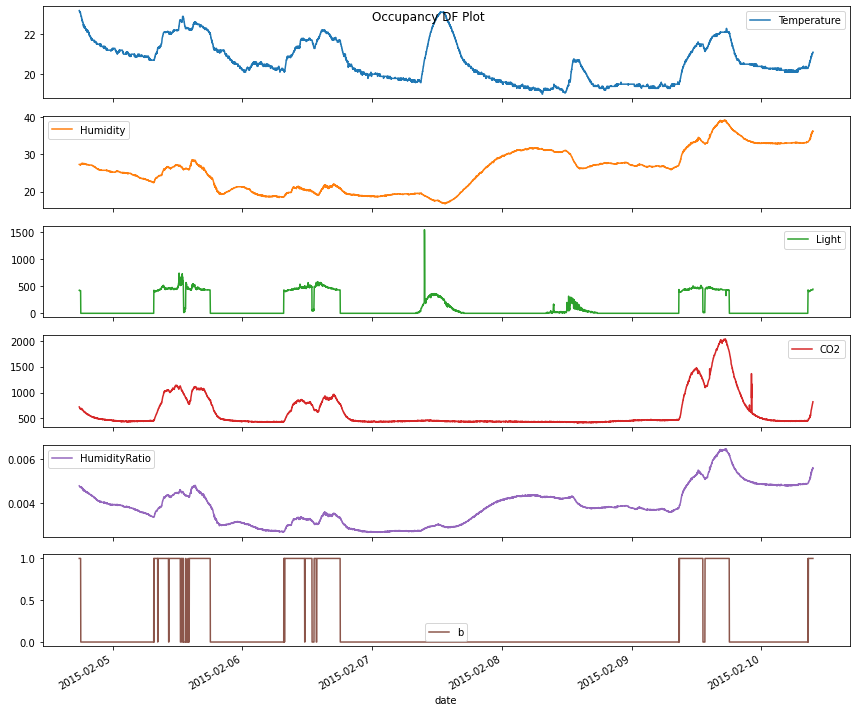

In [88]:
# plot the df

df.plot(title="Occupancy DF Plot", subplots=True, figsize = (12,10))
plt.tight_layout();
plt.legend('best')
plt.show();




## Partial String Indexing

We can pass a string representing a period of time (year) to retrieve all the values for that particulay year:



In [56]:
df['2015'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8143 entries, 2015-02-04 17:51:00 to 2015-02-10 09:33:00
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    8143 non-null   float64
 1   Humidity       8143 non-null   float64
 2   Light          8143 non-null   float64
 3   CO2            8143 non-null   float64
 4   HumidityRatio  8143 non-null   float64
 5   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 445.3 KB


We can also pass a 'slice' or a range of date that we want to retrieve data for:

In [60]:
df['2015-2-5' : '2015-2-6'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2880 entries, 2015-02-05 00:00:00 to 2015-02-06 23:58:59
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    2880 non-null   float64
 1   Humidity       2880 non-null   float64
 2   Light          2880 non-null   float64
 3   CO2            2880 non-null   float64
 4   HumidityRatio  2880 non-null   float64
 5   Occupancy      2880 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 157.5 KB


In [66]:
# retive data for a particular day
df.loc['2015-2-5', 'CO2']

date
2015-02-05 00:00:00    456.500000
2015-02-05 00:01:00    458.500000
2015-02-05 00:02:00    459.666667
2015-02-05 00:03:00    464.000000
2015-02-05 00:04:00    465.000000
                          ...    
2015-02-05 23:55:00    439.500000
2015-02-05 23:55:59    445.000000
2015-02-05 23:57:00    442.500000
2015-02-05 23:57:59    443.500000
2015-02-05 23:58:59    444.000000
Name: CO2, Length: 1440, dtype: float64

In [68]:
# change the frequency of the data to hourly
df.asfreq('H').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 136 entries, 2015-02-04 17:51:00 to 2015-02-10 08:51:00
Freq: H
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    136 non-null    float64
 1   Humidity       136 non-null    float64
 2   Light          136 non-null    float64
 3   CO2            136 non-null    float64
 4   HumidityRatio  136 non-null    float64
 5   Occupancy      136 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 7.4 KB


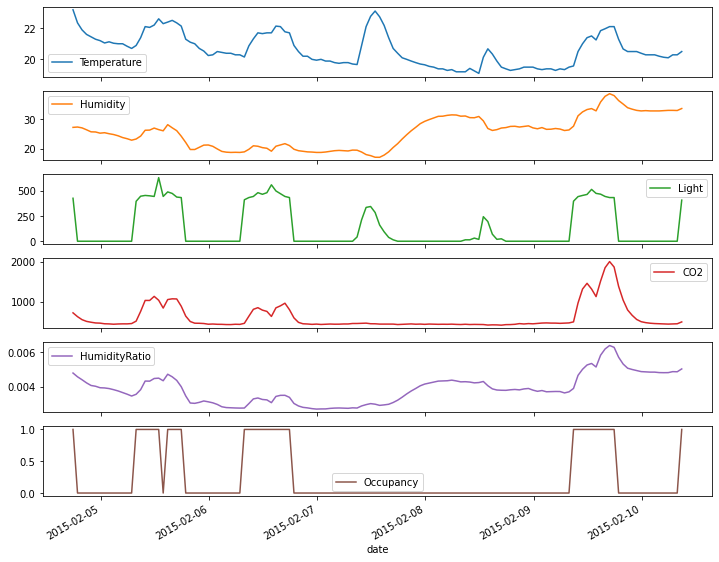

In [90]:
df.asfreq('H').plot(subplots=True, figsize = (12,10));

In [45]:
# import library for toy datasets
from vega_datasets import data as vds

df_stocks = vds.stocks()
df_stocks.head(5)

,symbol,date,price
0,MSFT,2000-01-01,39.81
1,MSFT,2000-02-01,36.35
2,MSFT,2000-03-01,43.22
3,MSFT,2000-04-01,28.37
4,MSFT,2000-05-01,25.45
5,MSFT,2000-06-01,32.54
6,MSFT,2000-07-01,28.40
7,MSFT,2000-08-01,28.40
8,MSFT,2000-09-01,24.53
9,MSFT,2000-10-01,28.02


In [ ]:
df_stocks.tail()

,symbol,date,price
555,AAPL,2009-11-01,199.91
556,AAPL,2009-12-01,210.73
557,AAPL,2010-01-01,192.06
558,AAPL,2010-02-01,204.62
559,AAPL,2010-03-01,223.02


In [ ]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   symbol  560 non-null    object        
 1   date    560 non-null    datetime64[ns]
 2   price   560 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 13.2+ KB


In [ ]:
# Create a new dataframe only for AAPL stock

df_aapl = df_stocks.loc[(df_stocks['symbol'] == 'AAPL')]

df_aapl.head()

,symbol,date,price
437,AAPL,2000-01-01,25.94
438,AAPL,2000-02-01,28.66
439,AAPL,2000-03-01,33.95
440,AAPL,2000-04-01,31.01
441,AAPL,2000-05-01,21.00


In [ ]:
# set date as index
df_aapl.set_index('date', inplace=True)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

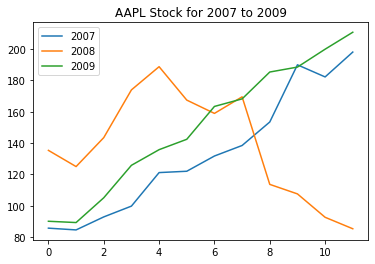

In [39]:
# Create an empty dataframe for stock prices
prices = pd.DataFrame()

# Select data for each year and concatenate with prices
for year in ['2007', '2008', '2009']:
    price_per_year = df_aapl.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot(title="AAPL Stock for 2007 to 2009")
plt.show()

## Basic Timeseries Calculations

Some of the basic calculations we can do with a timeseries dataset using `pandas` based on the `pd.DateTimeIndex`:
*   Shit or lag values back or forward in time
*   Get differences in values for a given time period
*   Compute the percent change over any number of periods



In [34]:
df_aapl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 437 to 559
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   symbol  123 non-null    object        
 1   date    123 non-null    datetime64[ns]
 2   price   123 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.8+ KB


## Moving Data between past & future

Shifting data is useful so they can be compared at different points in time. 
As the name indicates `.shift()` moves the data within the dataframe. 
`.shift()`:
   *   defaults to `periods=1`
   *   when the value passed to `periods` is positive the data will shift forward and when the value is negative `-1` the data will shift backwards/lag
   *   1 period into future or past

In [40]:
df_aapl['shifted'] = df_aapl.price.shift()
df_aapl.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,symbol,price,shifted
date,,,
2000-01-01,AAPL,25.94,NaN
2000-02-01,AAPL,28.66,25.94
2000-03-01,AAPL,33.95,28.66
2000-04-01,AAPL,31.01,33.95
2000-05-01,AAPL,21.00,31.01


In [43]:
df_aapl['lagged'] = df_aapl.price.shift(periods=-1)
df_aapl.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,symbol,price,shifted,lagged
date,,,,
2009-11-01,AAPL,199.91,188.50,210.73
2009-12-01,AAPL,210.73,199.91,192.06
2010-01-01,AAPL,192.06,210.73,204.62
2010-02-01,AAPL,204.62,192.06,223.02
2010-03-01,AAPL,223.02,204.62,NaN


## Calculate one-period percent change

We can use the shifted data we just created to calculate the change between periods which is also called the **financial return**
The finacial return is calculated as follows:

$$x_t / x_{t-1}$$


In [45]:
# create a new column and calculate the financial return
df_aapl['change'] = df_aapl.price.div(df_aapl.shifted)
df_aapl.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,symbol,price,shifted,lagged,change
date,,,,,
2000-01-01,AAPL,25.94,NaN,28.66,NaN
2000-02-01,AAPL,28.66,25.94,33.95,1.104857
2000-03-01,AAPL,33.95,28.66,31.01,1.184578
2000-04-01,AAPL,31.01,33.95,21.00,0.913402
2000-05-01,AAPL,21.00,31.01,26.19,0.677201


## Calculating one-period percent change

In [46]:
# create a new column and calculate the result
df_aapl['return'] = df_aapl.change.sub(1).mul(100)
df_aapl.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,symbol,price,shifted,lagged,change,return
date,,,,,,
2000-01-01,AAPL,25.94,NaN,28.66,NaN,NaN
2000-02-01,AAPL,28.66,25.94,33.95,1.104857,10.485736
2000-03-01,AAPL,33.95,28.66,31.01,1.184578,18.457781
2000-04-01,AAPL,31.01,33.95,21.00,0.913402,-8.659794
2000-05-01,AAPL,21.00,31.01,26.19,0.677201,-32.279910


## Built-in timeseries change
`.diff()`

*   This method is used to calculate the difference invalue for two adjacent periods. In finance, it is used to calculate the difference in close price since the last day the stocks were traded. 

$$x_t / x_{t-1}$$

In [48]:
# create a new column and calculate the diff()

df_aapl['diff'] = df_aapl.price.diff()
df_aapl.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,symbol,price,shifted,lagged,change,return,diff
date,,,,,,,
2000-01-01,AAPL,25.94,NaN,28.66,NaN,NaN,NaN
2000-02-01,AAPL,28.66,25.94,33.95,1.104857,10.485736,2.72
2000-03-01,AAPL,33.95,28.66,31.01,1.184578,18.457781,5.29
2000-04-01,AAPL,31.01,33.95,21.00,0.913402,-8.659794,-2.94
2000-05-01,AAPL,21.00,31.01,26.19,0.677201,-32.279910,-10.01


## Calculating % change
`.pct_change()`

*   Calculates the percent change for two adjacent periods

$$\frac{x_t}{x_{t-1}}$$

In [51]:
# create a new column and calculate the percentage change

df_aapl['pct_change'] = df_aapl.price.pct_change().mul(100)
df_aapl.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,symbol,price,shifted,lagged,change,return,diff,pct_change
date,,,,,,,,
2000-01-01,AAPL,25.94,NaN,28.66,NaN,NaN,NaN,NaN
2000-02-01,AAPL,28.66,25.94,33.95,1.104857,10.485736,2.72,10.485736
2000-03-01,AAPL,33.95,28.66,31.01,1.184578,18.457781,5.29,18.457781
2000-04-01,AAPL,31.01,33.95,21.00,0.913402,-8.659794,-2.94,-8.659794
2000-05-01,AAPL,21.00,31.01,26.19,0.677201,-32.279910,-10.01,-32.279910


## Exercise:

Set the frequency of the data to business day and shift the AAPL stock price 90 days into past and future and plot the results. Ensure the df contains daily prices.

```
# set frequency to business days
df_apple = df_aapl['price']
# create lagged and shifted columns
df_apple['lagged'] = df_apple.price.shift(periods=-90)
df_apple['shifted'] = df_apple.price.shift(periods=90)
# plot the price, lagged and shifted columns

df_aapl[['price', 'lagged', 'shifted']].plot(title="Apple Stock Price Comparison 90 Days into Past and Future")
plt.show()
```

## Comparing Timeseries Growth Rate

*  Timeseries data, stocks for instance, are hard to compare at different levels so they must be normalized so that the price series starts at 100.
   *   This is done by dividing all prices by the first element in the series and multiplying by 100
   *   As a result, the first value = 1 and each subsequent price now reflects the relative change to the initial price. All prices are relative to the starting point
   *   Multiply the normalized series by 100 and now we get the relative change to the initial prince in percentage points. For instance, a price change from 100 to 130 represents a 30 percent point increase.

Let's look at an example.   

In [23]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Create a data frame containing the price (Adj Close ) for Kodak ('KODK'), iRobot ('IRBT'), Amazon ('AMZN') and Google ('GOOG') using pandas datareader which imports data from the web.

In [36]:
all_data = {ticker : web.get_data_yahoo(ticker)
            for ticker in ['KODK', 'IRBT', 'AMZN', 'GOOG']}
price = pd.DataFrame({ticker : data['Adj Close']
                      for ticker, data in all_data.items()})
            


In [37]:
price.head()

,KODK,IRBT,AMZN,GOOG
Date,,,,
2015-09-09,15.11,30.129999,516.890015,612.719971
2015-09-10,15.25,29.709999,522.239990,621.349976
2015-09-11,15.48,30.049999,529.440002,625.770020
2015-09-14,14.99,29.889999,521.380005,623.239990
2015-09-15,15.41,30.320000,522.369995,635.140015


In [38]:
price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2015-09-09 to 2020-09-04
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   KODK    1258 non-null   float64
 1   IRBT    1258 non-null   float64
 2   AMZN    1258 non-null   float64
 3   GOOG    1258 non-null   float64
dtypes: float64(4)
memory usage: 49.1 KB


In [41]:
# Select the first price for the stocks
price.iloc[0]

KODK     15.110000
IRBT     30.129999
AMZN    516.890015
GOOG    612.719971
Name: 2015-09-09 00:00:00, dtype: float64

This returns a Series containing the first row of the dataframe which can now be used to normalized the data. 


In [42]:
normalized_df = price.div(price.iloc[0])
normalized_df.head()

,KODK,IRBT,AMZN,GOOG
Date,,,,
2015-09-09,1.000000,1.000000,1.000000,1.000000
2015-09-10,1.009265,0.986060,1.010350,1.014085
2015-09-11,1.024487,0.997345,1.024280,1.021299
2015-09-14,0.992058,0.992035,1.008687,1.017169
2015-09-15,1.019854,1.006306,1.010602,1.036591


We would need a benchmark to compare performance so we can import data from the web for SPDR S&P 500 ETF

In [43]:
bench = {ticker : web.get_data_yahoo(ticker)
         for ticker in ['SPY']}
bench_price = pd.DataFrame({ticker : data['Adj Close']
                      for ticker, data in bench.items()})

In [44]:
bench_price.head()

,SPY
Date,
2015-09-09,176.350250
2015-09-10,177.309891
2015-09-11,178.115662
2015-09-14,177.454758
2015-09-15,179.672806


In [45]:
bench_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2015-09-09 to 2020-09-04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     1258 non-null   float64
dtypes: float64(1)
memory usage: 19.7 KB


Now that we have the stock price and the benchmark data, we can combine them into a single dataframe using `pd.concat`

In [47]:
price_concat = pd.concat([price, bench_price], axis=1).dropna()
price_concat.head(3)

,KODK,IRBT,AMZN,GOOG,SPY
Date,,,,,
2015-09-09,15.11,30.129999,516.890015,612.719971,176.350250
2015-09-10,15.25,29.709999,522.239990,621.349976,177.309891
2015-09-11,15.48,30.049999,529.440002,625.770020,178.115662


In [49]:
price_concat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2015-09-09 to 2020-09-04
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   KODK    1258 non-null   float64
 1   IRBT    1258 non-null   float64
 2   AMZN    1258 non-null   float64
 3   GOOG    1258 non-null   float64
 4   SPY     1258 non-null   float64
dtypes: float64(5)
memory usage: 59.0 KB


We can use the concatenated dataframe to compare the prices against the benchmark. We first normalized the data and multuply by 100, plot the data and see of each stock performed against `SPY`

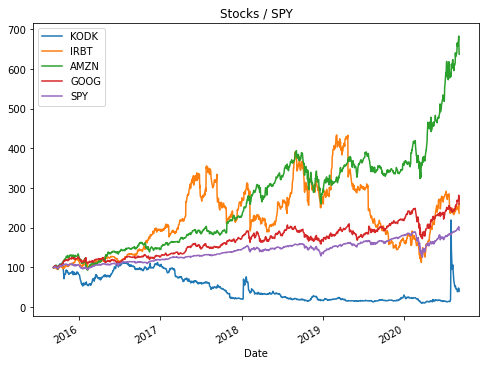

In [53]:
normalized = price_concat.div(price_concat.iloc[0]).mul(100)
normalized.plot(title="Stocks / SPY",figsize = (8,6));

To see the performance difference for each individual stock relative to the benchmark in percentage points, we can subtract the normalized `SPY` from the normalized stock prices. Use `.sub` with the keyword `axis=0` to align the Series index with the DataFrame index. This will make pandas subtract the Series from each column.
Plot the data to see how each stock performed relative to the benchmark.

In [56]:
diff = normalized.sub(normalized['SPY'], axis=0)
diff.head()

,KODK,IRBT,AMZN,GOOG,SPY
Date,,,,,
2015-09-09,0.000000,0.000000,0.000000,0.000000,0.0
2015-09-10,0.382374,-1.938127,0.490864,0.864307,0.0
2015-09-11,1.447626,-1.266598,1.426898,1.128773,0.0
2015-09-14,-1.420490,-1.422862,0.242340,1.090623,0.0
2015-09-15,0.101375,-1.253464,-0.823883,1.775035,0.0


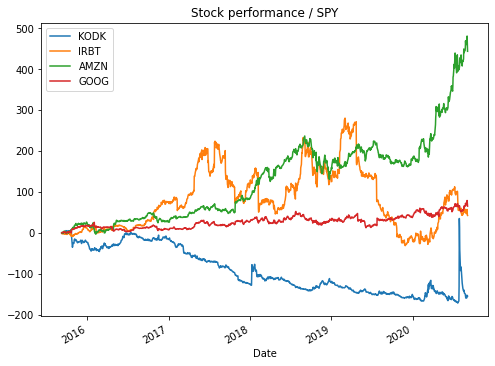

In [58]:
diff[['KODK', 'IRBT', 'AMZN', 'GOOG']].plot(title="Stock performance / SPY", figsize = (8,6));

## Changing Frequency - Resampling

We can change the frequency in a `DateTimeIndex` using `as.freq()`. Keep in mind that chaging the frequency also changes the underlying data. 
When **unsampling**, converting the data to a higher frequency, we create new rows and need to tell pandas how to interpolate the missing data. 
When **downsampling** we reduce the number of rows  and need to tell pandas how to aggregate the existing data. 

We can use the following methods to manioulate our data:

*   `.asfreq()`
*   `.reindex()`
*   `.resample()` + tranformation method

Let's illustrate this concept by creating some ramdon quaterly data and changing resampling it. 




In [60]:
# Resample d

dates = pd.date_range(start='2019', periods=4, freq='Q')
data = range(1, 5)

quaterly = pd.Series(data=data, index=dates)
quaterly

2019-03-31    1
2019-06-30    2
2019-09-30    3
2019-12-31    4
Freq: Q-DEC, dtype: int64

In [62]:
# change to monthly frequency

monthly = quaterly.asfreq('M')
monthly

2019-03-31    1.0
2019-04-30    NaN
2019-05-31    NaN
2019-06-30    2.0
2019-07-31    NaN
2019-08-31    NaN
2019-09-30    3.0
2019-10-31    NaN
2019-11-30    NaN
2019-12-31    4.0
Freq: M, dtype: float64

## Upsampling to fill in missing values

We can convert a Series to DataFrame by applying the `to_frame()` method passing a column name as parameter

In [63]:
monthly = monthly.to_frame('baselines')
monthly

,baselines
2019-03-31,1.0
2019-04-30,NaN
2019-05-31,NaN
2019-06-30,2.0
2019-07-31,NaN
2019-08-31,NaN
2019-09-30,3.0
2019-10-31,NaN
2019-11-30,NaN
2019-12-31,4.0


We can impute the missing values using the following methods:
*   forward fill -- `method='ffill`
*   back fill -- `method='bfill`
*   fill with 0 -- `fill_value=0`


In [65]:
monthly['ffill'] = quaterly.asfreq('M', method='ffill')
monthly['bfill'] = quaterly.asfreq('M', method='bfill')
monthly['value'] = quaterly.asfreq('M', fill_value=0)

In [66]:
monthly

,baselines,ffill,bfill,value
2019-03-31,1.0,1,1,1
2019-04-30,NaN,1,2,0
2019-05-31,NaN,1,2,0
2019-06-30,2.0,2,2,2
2019-07-31,NaN,2,3,0
2019-08-31,NaN,2,3,0
2019-09-30,3.0,3,3,3
2019-10-31,NaN,3,4,0
2019-11-30,NaN,3,4,0
2019-12-31,4.0,4,4,4


## Reindexing

Let's say we want a monthly `DateTiemIndex` for a full year, we can use `.reindex()` In this case pandas aligns existing data with new monthly values and creates missing values elsewhere. and we can use the same filling methods we saw above the impute the missing data. 


In [68]:
dates = pd.date_range(start='2019',
                      periods=12,
                      freq='M')

In [69]:
quaterly.reindex(dates)

2019-01-31    NaN
2019-02-28    NaN
2019-03-31    1.0
2019-04-30    NaN
2019-05-31    NaN
2019-06-30    2.0
2019-07-31    NaN
2019-08-31    NaN
2019-09-30    3.0
2019-10-31    NaN
2019-11-30    NaN
2019-12-31    4.0
Freq: M, dtype: float64

In [72]:
quaterly.reindex(dates, method='bfill')


2019-01-31    1
2019-02-28    1
2019-03-31    1
2019-04-30    2
2019-05-31    2
2019-06-30    2
2019-07-31    3
2019-08-31    3
2019-09-30    3
2019-10-31    4
2019-11-30    4
2019-12-31    4
Freq: M, dtype: int64

In [73]:
quaterly.reindex(dates, method='ffill')

2019-01-31    NaN
2019-02-28    NaN
2019-03-31    1.0
2019-04-30    1.0
2019-05-31    1.0
2019-06-30    2.0
2019-07-31    2.0
2019-08-31    2.0
2019-09-30    3.0
2019-10-31    3.0
2019-11-30    3.0
2019-12-31    4.0
Freq: M, dtype: float64

## Frequency Conversion & Transformation Methods

Pandas' `.resample()` follows a logic similar to `.groupby()`. It groups data within resampling periods and applies one or several methods to each group. It takes the value created by this method and assigns a new date within the resampling period. The new date is determined by the `offset` and it can be located at `start`, `end`, and a custom location. 

Let's apply these concepts to the *Civilian Unemployment Rate* data for the US. 

I am going to use `QUANDL` to retrieve the unemployment data. 
You can `pip install` it in your system by running the command below on the terminal:

In [74]:
!pip3 install quandl


In [75]:
import quandl

In [78]:
# pass your API key and dataset name
quandl.ApiConfig.api_key = "Your API Key"
df_unemployment = quandl.get("FRED/UNRATE")

In [104]:
df_unemployment.tail()

,Value
Date,
2020-04-01,14.7
2020-05-01,13.3
2020-06-01,11.1
2020-07-01,10.2
2020-08-01,8.4


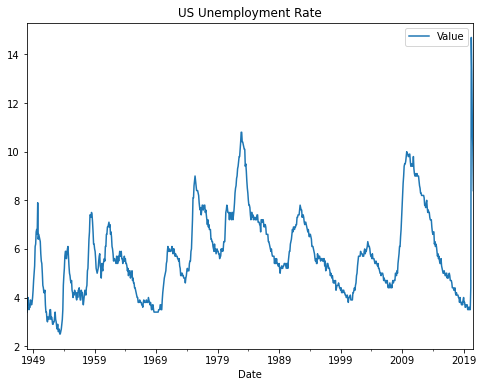

In [120]:
df_unemployment.plot(title="US Unemployment Rate", figsize = (8,6));

In [106]:
df_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 872 entries, 1948-01-01 to 2020-08-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   872 non-null    float64
dtypes: float64(1)
memory usage: 53.6 KB


As we can see, the dataset contains the unemployment rate for the US from 1948 to now (Aug 2020). It has a monthly frequency as each data point is entered at the beginning of each month. 
To make it more manageable, we will create a new data set that contains only the last 14 years. 
We would need to reindex these data to weekly values. Reindex will create `NanNs` that we have to impute.

In [107]:
df_unempl_14_years = df_unemployment['2006':]

In [108]:
df_unempl_14_years.head()

,Value
Date,
2006-01-01,4.7
2006-02-01,4.8
2006-03-01,4.7
2006-04-01,4.7
2006-05-01,4.6


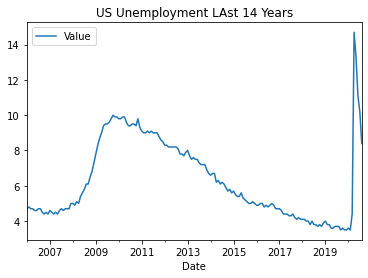

In [109]:
df_unempl_14_years.plot(title='US Unemployment LAst 14 Years')

In [101]:
# Create weekly dates
weekly_dates_un = pd.date_range(start=df_unempl_14_years.index.min(),
                             end=df_unempl_14_years.index.max(),
                             freq='W')


In [110]:
# reindex from monthly to weekly data
weekly_un= df_unempl_14_years.reindex(weekly_dates)
weekly_un

,Value
2006-01-01,4.7
2006-01-08,NaN
2006-01-15,NaN
2006-01-22,NaN
2006-01-29,NaN
...,...
2020-06-28,NaN
2020-07-05,NaN
2020-07-12,NaN
2020-07-19,NaN


In [112]:
weekly_un.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 761 entries, 2006-01-01 to 2020-07-26
Freq: W-SUN
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   27 non-null     float64
dtypes: float64(1)
memory usage: 11.9 KB


In [114]:
# Create a new column and forward fill the data

weekly_un['ffill'] = weekly_un.Value.ffill()
weekly_un['interpolated'] = weekly_un.Value.interpolate()


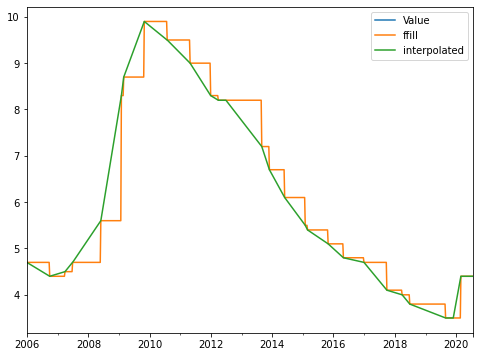

In [121]:
# plot data
weekly_un.plot(figsize = (8,6));

## Downsampling & Aggregating Methods

We can define downsampling as reducing the frequency of out timeseries data. For instance, we can reduce hourly data to daily data and daily to monthly data. To achieve this, we need to determine how to summarize/aggregate the existing data -- the 24 hourly data points will become a single datapoint when downsampling from hourly to daily. 
The options to aggregate data include using the `mean`, `media` or `last value` and that choice would be determined by the context/need of our analysis. 
For this example, we can use the *CO2 Concentration* data set from vega which contains a monthly value starting on 1958.

In [132]:
# import library for toy datasets
from vega_datasets import data as vds

df_co2 = vds.co2_concentration()
df_co2.head(5)

,Date,CO2,adjusted CO2
0,1958-03-01,315.70,314.44
1,1958-04-01,317.46,315.16
2,1958-05-01,317.51,314.71
3,1958-07-01,315.86,315.19
4,1958-08-01,314.93,316.19


In [133]:
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          741 non-null    object 
 1   CO2           741 non-null    float64
 2   adjusted CO2  741 non-null    float64
dtypes: float64(2), object(1)
memory usage: 17.5+ KB


By getting the dataframe's info we can see that it is not a timeseries dataframe so we must convert the date object column to 'DateTimeIndex` and also set it as the index.

In [134]:
df_co2.Date = pd.to_datetime(df_co2.Date)

In [135]:
# set date as index
df_co2.set_index('Date', inplace=True)

In [136]:
df_co2.head()

,CO2,adjusted CO2
Date,,
1958-03-01,315.70,314.44
1958-04-01,317.46,315.16
1958-05-01,317.51,314.71
1958-07-01,315.86,315.19
1958-08-01,314.93,316.19


In [137]:
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 741 entries, 1958-03-01 to 2020-04-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CO2           741 non-null    float64
 1   adjusted CO2  741 non-null    float64
dtypes: float64(2)
memory usage: 17.4 KB


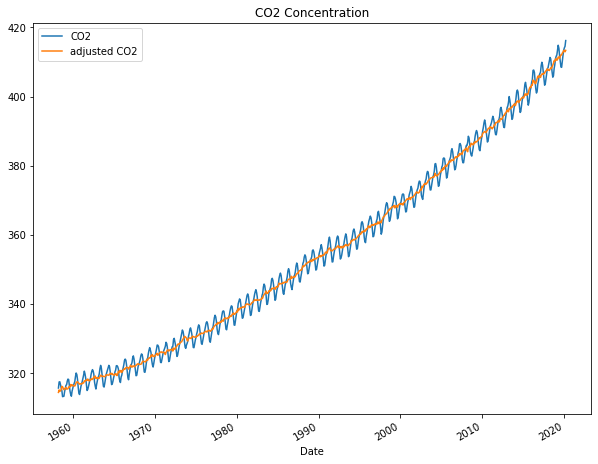

In [140]:
#plot data
df_co2.plot(title='CO2 Concentration', figsize=(10,8));

In [144]:
# Change frequency from monthly to yearly
# and aggregate using the mean
df_co2_yearly = df_co2.resample('Y').mean()

# display head
df_co2_yearly.head()

,CO2,adjusted CO2
Date,,
1958-12-31,315.333750,315.300000
1959-12-31,315.981667,315.977500
1960-12-31,316.909167,316.907500
1961-12-31,317.645000,317.638333
1962-12-31,318.454167,318.448333


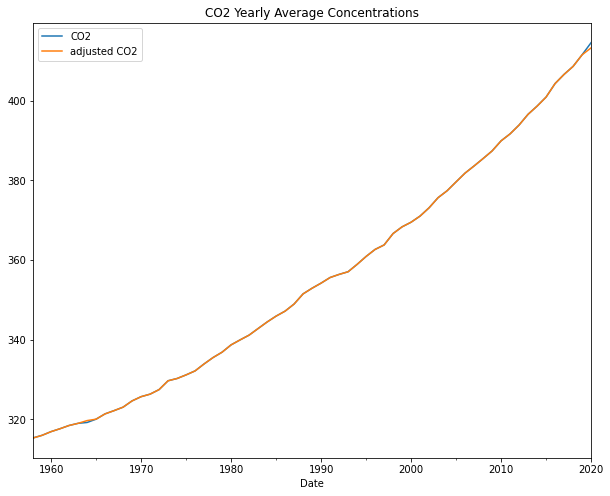

In [145]:
df_co2_yearly.plot(title="CO2 Yearly Average Concentrations", figsize=(10,8))

We aggregated the data using the `.mean()` but we also have other options to do so. We can also apply multiple aggregations at once by using the `.agg` method and passing a list of aggregation functions such as `median` and `std`.

In [147]:
df_co2_yearly.resample('Y').agg(['mean', 'std']).head()

CO2     adjusted CO2    
                  mean std         mean std
Date                                       
1958-12-31  315.333750 NaN   315.300000 NaN
1959-12-31  315.981667 NaN   315.977500 NaN
1960-12-31  316.909167 NaN   316.907500 NaN
1961-12-31  317.645000 NaN   317.638333 NaN
1962-12-31  318.454167 NaN   318.448333 NaN

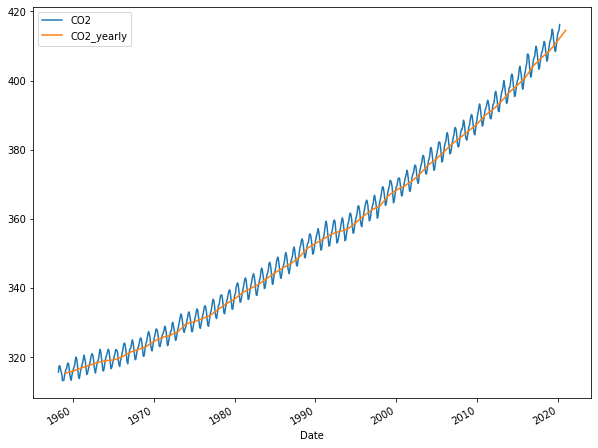

In [157]:
ax = df_co2[['CO2']].plot(figsize=(10, 8))
yearly = df_co2[['CO2']].resample('Y').mean()
yearly.add_suffix('_yearly').plot(ax=ax)

We can revisit the `price` dataframe we created earlier to practice resampling, changing frequency and aggregating methods.

In [158]:
price.head()

,KODK,IRBT,AMZN,GOOG
Date,,,,
2015-09-09,15.11,30.129999,516.890015,612.719971
2015-09-10,15.25,29.709999,522.239990,621.349976
2015-09-11,15.48,30.049999,529.440002,625.770020
2015-09-14,14.99,29.889999,521.380005,623.239990
2015-09-15,15.41,30.320000,522.369995,635.140015


In [159]:
# create monthly averages

monthly_average = price.resample('M').mean()

In [160]:
monthly_average.head()

,KODK,IRBT,AMZN,GOOG
Date,,,,
2015-09-30,15.405625,29.700625,525.732506,621.430618
2015-10-31,15.185909,30.333636,566.743181,663.592718
2015-11-30,13.173000,31.819500,657.695499,735.388498
2015-12-31,12.955454,34.823182,669.262279,755.354548
2016-01-31,9.513684,32.277369,601.061578,718.495792


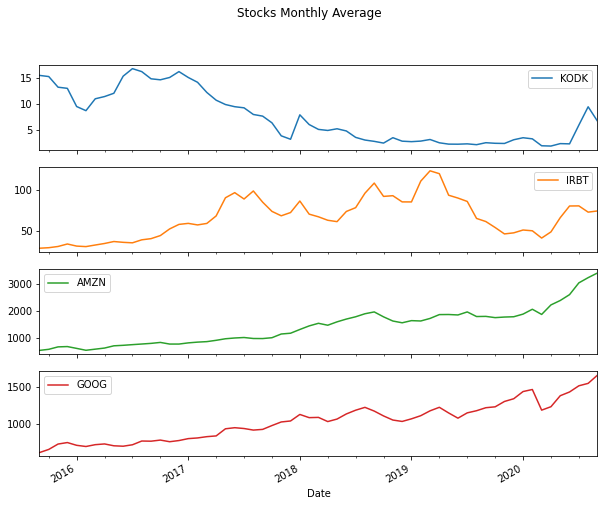

In [162]:
# plot data

monthly_average.plot(title="Stocks Monthly Average", subplots=True, figsize=(10,8));

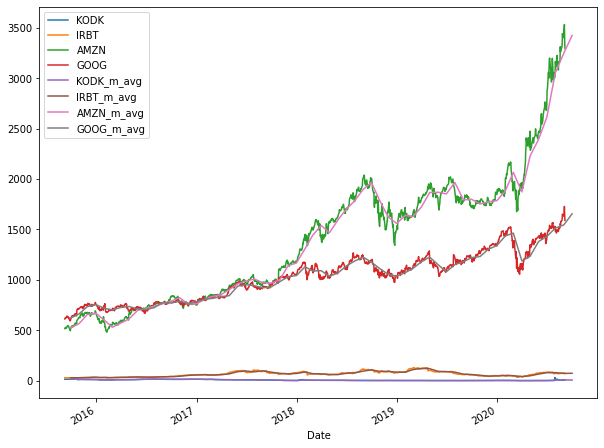

In [163]:
ax = price.plot(figsize=(10, 8))
m_avg = price.resample('M').mean()
m_avg.add_suffix('_m_avg').plot(ax=ax)

In [165]:
# calculate daily returns

# convert df prices to a pd.Series() and calculate the pct_change

daily_returns = price.squeeze().pct_change()


In [167]:
# Resample and calculate stats

stats = daily_returns.resample('M').agg(['mean', 'median', 'std'])

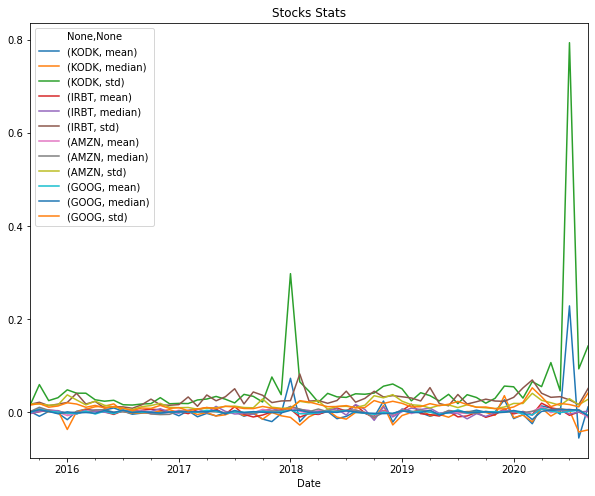

In [170]:
# plot stats
stats.plot(title="Stocks Stats", figsize=(10,8))